In [4]:
import collections
import glob
import itertools
import json
import matplotlib
rc_fonts = {
    "font.weight": 800,
    "font.family": "serif",
    "font.serif": ["Times"], # use latex's default
    "font.sans-serif": ["DejaVu Sans"],
    "text.usetex": True,
}
matplotlib.rcParams.update(rc_fonts)
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

In [5]:
import s3dexp.db

<IPython.core.display.Javascript object>


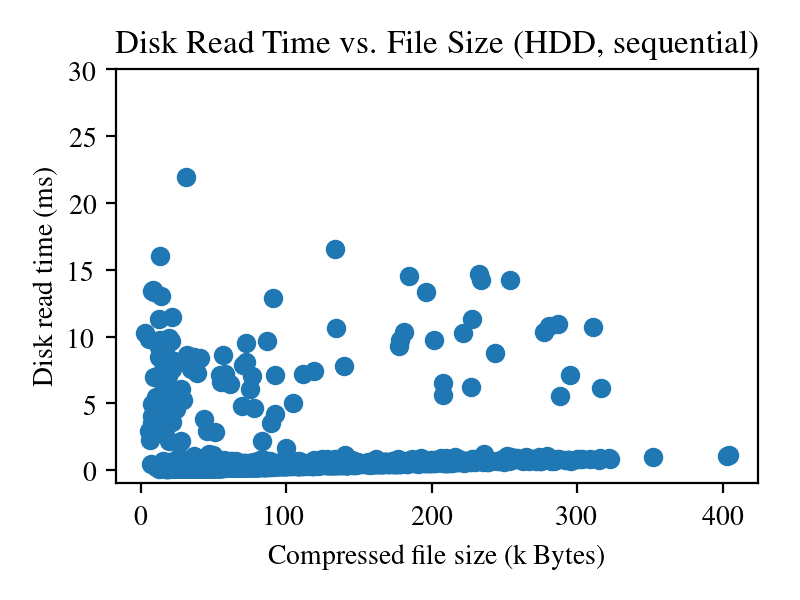

<IPython.core.display.Javascript object>


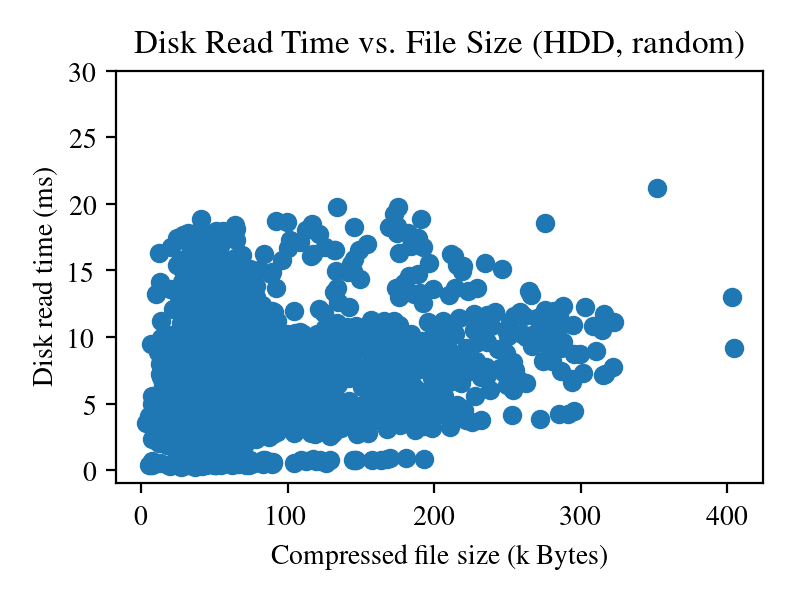

<IPython.core.display.Javascript object>


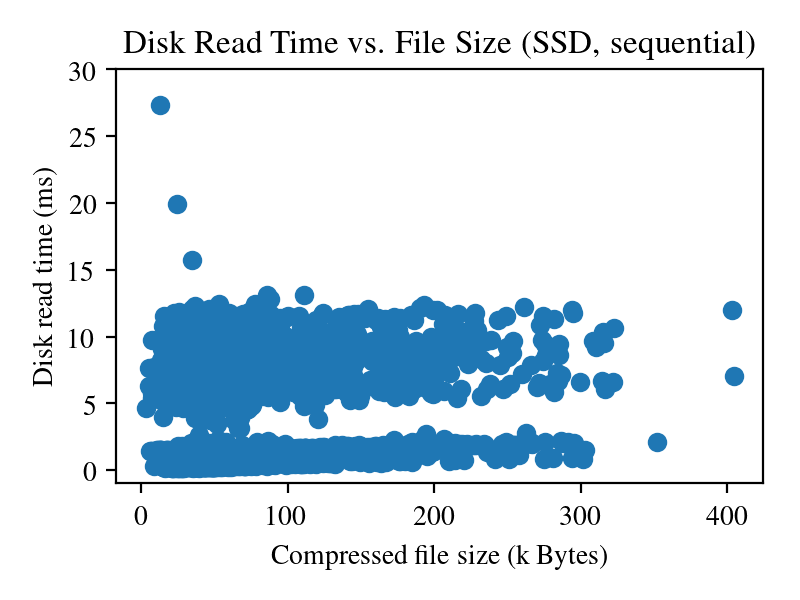

<IPython.core.display.Javascript object>


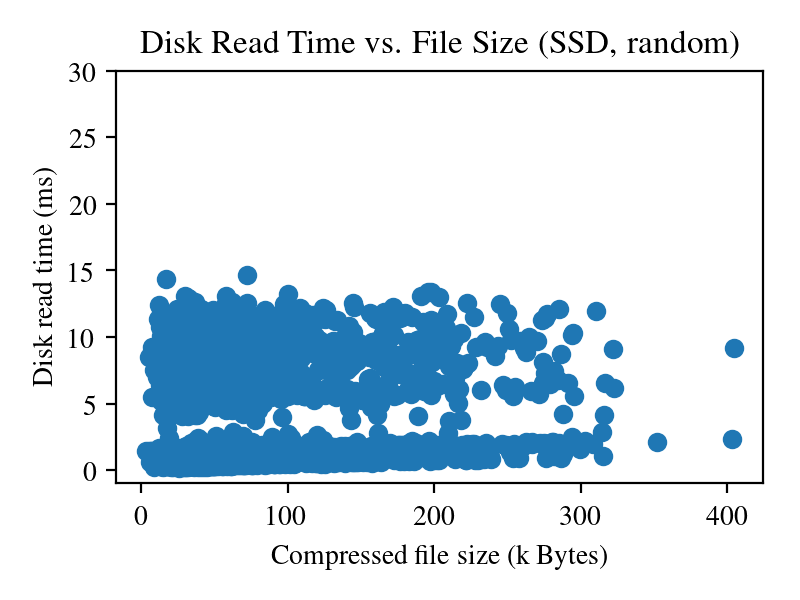

In [16]:
%matplotlib notebook

for disk, disk_text in [('hdd', 'HDD'), ('ssd', 'SSD'),]:
    df = pd.read_sql(
    'SELECT size, rand_read_ms, seq_read_ms, disk \
        FROM DiskReadProfile \
        WHERE disk=%s', 
    s3dexp.db.engine,
    params=[disk,])
    for seq_text, seq_col in [('sequential', 'seq_read_ms'), ('random', 'rand_read_ms')]:
        plt.figure(figsize=(4,3))
        plt.scatter(df['size'] / 1024, df[seq_col])
        plt.xlabel('Compressed file size (k Bytes)')
        plt.ylabel('Disk read time (ms)')
        plt.title('Disk Read Time vs. File Size ({}, {})'.format(disk_text, seq_text))
        plt.ylim(-1, 30)
        plt.tight_layout()
        plt.savefig('readtime-filesize-{}-{}.pdf'.format(disk_text, seq_text), bbox_inches ='tight')

In [18]:
df = pd.read_sql(
    'SELECT size, height*width/1000000 as mpix, decode_ms FROM DecodeProfile \
        WHERE basename LIKE %s',
    s3dexp.db.engine,
    params=['%.jpg'])

In [19]:
df.head()

,size,mpix,decode_ms
0,51071,0.1875,1.832008
1,89774,0.1875,3.156662
2,79589,0.7864,6.402334
3,84876,0.1875,2.760649
4,39755,0.1875,1.684348


<IPython.core.display.Javascript object>


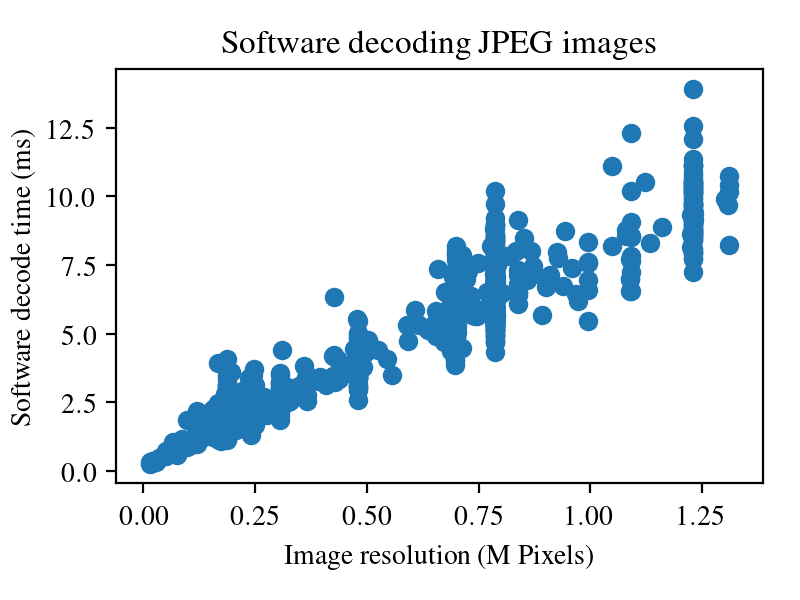

<IPython.core.display.Javascript object>


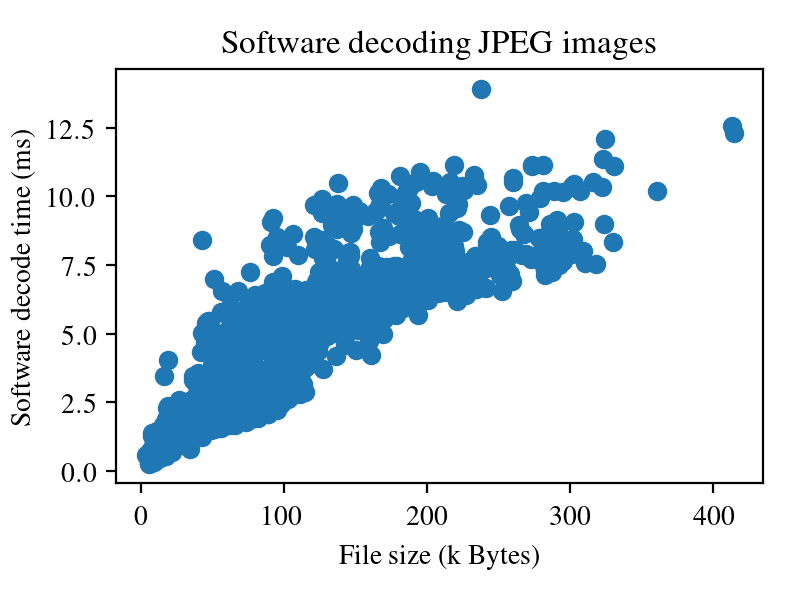

In [21]:
%matplotlib notebook

plt.figure(figsize=(4,3))
plt.scatter(df['mpix'], df['decode_ms'])
plt.xlabel('Image resolution (M Pixels)')
plt.ylabel('Software decode time (ms)')
plt.title('Software decoding JPEG images')
plt.tight_layout()
plt.savefig('decodetime-mpix.pdf'.format(disk_text, seq_text), bbox_inches ='tight')


plt.figure(figsize=(4,3))
plt.scatter(df['size'] / 1000, df['decode_ms'])
plt.xlabel('File size (k Bytes)')
plt.ylabel('Software decode time (ms)')
plt.title('Software decoding JPEG images')
plt.tight_layout()
plt.savefig('decodetime-filesize.pdf'.format(disk_text, seq_text), bbox_inches ='tight')